In [356]:
import pandas as pd
import numpy as np

In [358]:
df=pd.read_csv(r"C:\Users\ABC\Documents\datascience survey\DataSceinceSurvey.csv", dtype=str)

In [359]:
df.shape

(106301, 195)

In [360]:
df.drop_duplicates(inplace=True)

In [361]:
df.shape

(101833, 195)

In [362]:
dropCol=[col for col in df.columns if "Other" in col or "None" in col ]
df.drop(columns=dropCol, inplace=True)

In [363]:
df.shape

(101833, 190)

## remove uneccesarycolumns

In [368]:
dropCol=df.columns[188:]
df.drop(columns=dropCol, inplace=True)

In [371]:
dropCol=[col for col in df.columns if "HW" in col or "TPU" in col or "CV_" in col or "DS" in col or "ML_in_Business" in col or "ML_Cloud_Spend" in col or "MML" in col or "AutoML_" in col or "MLExp_" in col or "Media_" in col or "Share_" in col 
or "Course_" in col or "DurationInSeconds" in col or "Company_Size" in col]
df.drop(columns=dropCol, inplace=True)


In [375]:
df.shape

(101833, 177)

In [378]:
df.reset_index(drop=True, inplace=True)


In [380]:
df.fillna("",inplace=True)

In [381]:
df["Coding_Years"].unique()

array(['5-10 years', '20+ years', '1-3 years', '< 1 years', '3-5 years',
       '10-20 years', 'I have never written code', '1-2 years', '',
       'I have never written code but I want to learn', '< 1 year',
       '20-30 years', '30-40 years',
       'I have never written code and I do not want to learn',
       '40+ years', 'More than 10 years', 'Less than a year',
       '3 to 5 years', '6 to 10 years', '1 to 2 years',
       "I don't write code to analyze data"], dtype=object)

In [382]:
col=df.columns[120:]
df.drop(columns=col, inplace=True)

## categorical handling

In [387]:
experience_map = {
    'I have never written code': 'Never coded',
    'I have never written code but I want to learn': 'Never coded',
    'I have never written code and I do not want to learn': 'Never coded',
    "I don't write code to analyze data": 'Never coded',
    '< 1 years': 'Less than 1 year',
    '< 1 year': 'Less than 1 year',
    'Less than a year': 'Less than 1 year',
    '1-2 years': '1-2 years',
    '1 to 2 years': '1-2 years',
    '1-3 years': '1-3 years',
    '3-5 years': '3-5 years',
    '3 to 5 years': '3-5 years',
    '5-10 years': '5-10 years',
    '6 to 10 years': '5-10 years',
    '10-20 years': '10-20 years',
    'More than 10 years': '10+ years',
    '20+ years': '20+ years',
    '20-30 years': '20+ years',
    '30-40 years': '20+ years',
    '40+ years': '20+ years',
    '': np.nan   # blank values → missing
}

df['Coding_Years'] = df['Coding_Years'].replace(experience_map)


In [389]:
df["Platform"].unique()

array(['A laptop',
       'A cloud computing platform (AWS, Azure, GCP, hosted notebooks, etc)',
       'A personal computer / desktop',
       'A deep learning workstation (NVIDIA GTX, LambdaLabs, etc)', '',
       'Other', 'A personal computer or laptop'], dtype=object)

In [391]:
hardware_map = {
    'A laptop': 'Laptop',
    'A personal computer / desktop': 'Desktop',
    'A personal computer or laptop': 'Laptop',
    'A cloud computing platform (AWS, Azure, GCP, hosted notebooks, etc)': 'Cloud platform',
    'A deep learning workstation (NVIDIA GTX, LambdaLabs, etc)': 'Workstation',
    'Other': 'Other',
    '': np.nan   # blank values → missing
}

df['Platform'] = df['Platform'].replace(hardware_map)



In [393]:
df["Platform"].unique()

array(['Laptop', 'Cloud platform', 'Desktop', 'Workstation', nan, 'Other'],
      dtype=object)

In [397]:
df["Tool_Primary"].unique()

array(['Local development environments (RStudio, JupyterLab, etc.)',
       'Advanced statistical software (SPSS, SAS, etc.)',
       'Basic statistical software (Microsoft Excel, Google Sheets, etc.)',
       '',
       'Business intelligence software (Salesforce, Tableau, Spotfire, etc.)',
       'Cloud-based data software & APIs (AWS, GCP, Azure, etc.)',
       'Other'], dtype=object)

In [403]:
mapping = {
    "Local development environments (RStudio, JupyterLab, etc.)": "Local Dev (RStudio, JupyterLab)",
    "Advanced statistical software (SPSS, SAS, etc.)": "Stat Software (SPSS, SAS)",
    "Basic statistical software (Microsoft Excel, Google Sheets, etc.)": "Basic Tools (Excel, Sheets)",
    "Business intelligence software (Salesforce, Tableau, Spotfire, etc.)": "BI Tools (Tableau, Salesforce, Spotfire)",
    "Cloud-based data software & APIs (AWS, GCP, Azure, etc.)": "Cloud & APIs (AWS, GCP, Azure)",
    "Other":np.nan,
    "": np.nan  # if you want to replace blank with Other
}

df["Tool_Primary"]=df["Tool_Primary"].replace(mapping)

In [405]:
df["Tool_Primary"].unique()

array(['Local Dev (RStudio, JupyterLab)', 'Stat Software (SPSS, SAS)',
       'Basic Tools (Excel, Sheets)', nan,
       'BI Tools (Tableau, Salesforce, Spotfire)',
       'Cloud & APIs (AWS, GCP, Azure)'], dtype=object)

In [407]:
df["Industry"].unique()

array(['Manufacturing/Fabrication', 'Academics/Education', '',
       'Computers/Technology', 'Other', 'Shipping/Transportation',
       'Energy/Mining', 'Insurance/Risk Assessment', 'Non-profit/Service',
       'Accounting/Finance', 'Hospitality/Entertainment/Sports',
       'Government/Public Service',
       'Online Service/Internet-based Services',
       'Online Business/Internet-based Sales', 'Medical/Pharmaceutical',
       'Retail/Sales', 'Broadcasting/Communications', 'Marketing/CRM',
       'Military/Security/Defense', 'I am a student'], dtype=object)

In [409]:
# Mapping dictionary for industry
new = {
    '': np.nan,
    'Manufacturing/Fabrication': 'Manufacturing/Fabrication',
    'Academics/Education': 'Academics/Education',
    'Computers/Technology': 'Computers/Technology',
    'Other': 'Other',
    'Shipping/Transportation': 'Shipping/Transportation',
    'Energy/Mining': 'Energy/Mining',
    'Insurance/Risk Assessment': 'Insurance/Risk Assessment',
    'Non-profit/Service': 'Non-profit/Service',
    'Accounting/Finance': 'Accounting/Finance',
    'Hospitality/Entertainment/Sports': 'Hospitality/Entertainment/Sports',
    'Government/Public Service': 'Government/Public Service',
    'Online Service/Internet-based Services': 'Online Service/Internet-based Services',
    'Online Business/Internet-based Sales': 'Online Business/Internet-based Sales',
    'Medical/Pharmaceutical': 'Medical/Pharmaceutical',
    'Retail/Sales': 'Retail/Sales',
    'Broadcasting/Communications': 'Broadcasting/Communications',
    'Marketing/CRM': 'Marketing/CRM',
    'Military/Security/Defense': 'Military/Security/Defense',
    'I am a student': 'Student'
}

# Apply replacement
df["Industry"] = df["Industry"].replace(new)



In [411]:
df["Industry"].unique()

array(['Manufacturing/Fabrication', 'Academics/Education', nan,
       'Computers/Technology', 'Other', 'Shipping/Transportation',
       'Energy/Mining', 'Insurance/Risk Assessment', 'Non-profit/Service',
       'Accounting/Finance', 'Hospitality/Entertainment/Sports',
       'Government/Public Service',
       'Online Service/Internet-based Services',
       'Online Business/Internet-based Sales', 'Medical/Pharmaceutical',
       'Retail/Sales', 'Broadcasting/Communications', 'Marketing/CRM',
       'Military/Security/Defense', 'Student'], dtype=object)

In [413]:
df

,Year,Age,Gender,Country,Education,Role,Coding_Years,Lang_Python,Lang_R,Lang_SQL,...,BI_Tableau,BI_Salesforce,BI_Qlik,BI_Domo,BI_Spotfire,BI_Alteryx,BI_Sisense,BI_SAP,BI_MostUsed,Tool_Primary
0,2021,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,,...,,,,,,,,,,"Local Dev (RStudio, JupyterLab)"
1,2021,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,,,SQL,...,,,,,,,,,,"Stat Software (SPSS, SAS)"
2,2021,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,,,...,,,,,,,,,,"Basic Tools (Excel, Sheets)"
3,2021,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,,,...,,,,,,,,,,"Local Dev (RStudio, JupyterLab)"
4,2021,45-49,Man,India,Doctoral degree,Other,Less than 1 year,Python,,,...,,,,,,,,,,"Local Dev (RStudio, JupyterLab)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101828,2017,30-34,Male,People 's Republic of China,Master's degree,DBA/Database Engineer,3-5 years,,,,...,,,,,,,,,,NaN
101829,2017,22-24,Female,Other,Master's degree,,Less than 1 year,,,,...,,,,,,,,,,NaN
101830,2017,25-29,Male,Indonesia,Bachelor's degree,Programmer,1-2 years,,,,...,,,,,,,,,,NaN
101831,2017,,Female,Singapore,I prefer not to answer,,NaN,,,,...,,,,,,,,,,NaN


In [415]:
df["Gender"].unique()

array(['Man', 'Woman', 'Nonbinary', 'Prefer not to say',
       'Prefer to self-describe', 'Male', 'Female',
       'Non-binary, genderqueer, or gender non-conforming',
       'A different identity', ''], dtype=object)

In [417]:
new = {
    'Man': 'Male',
    'Male': 'Male',
    'Woman': 'Female',
    'Female': 'Female',
    'Nonbinary': 'Non-binary',
    'Non-binary, genderqueer, or gender non-conforming': 'Non-binary',
    'Prefer not to say': 'Prefer not to say',
    'Prefer to self-describe': 'Prefer to self-describe',
    'A different identity': 'Prefer to self-describe',
    '': np.nan
}
df["Gender"]=df["Gender"].replace(new)

In [419]:
df["Gender"].unique()

array(['Male', 'Female', 'Non-binary', 'Prefer not to say',
       'Prefer to self-describe', nan], dtype=object)

In [421]:
df["IDE_Jupyter"].unique()

array(['', 'Jupyter (JupyterLab, Jupyter Notebooks, etc) ',
       'Jupyter/IPython'], dtype=object)

In [423]:
# Mapping dictionary
new = {
    '': np.nan,
    'Jupyter (JupyterLab, Jupyter Notebooks, etc) ': 'Jupyter',
    'Jupyter/IPython': 'Jupyter'
}

# Apply replacement
df["IDE_Jupyter"] = df["IDE_Jupyter"].replace(new)




In [425]:
df["IDE_Jupyter"].unique()

array([nan, 'Jupyter'], dtype=object)

In [427]:
df["Country"].unique()

array(['India', 'Indonesia', 'Pakistan', 'Mexico', 'Russia', 'Turkey',
       'Australia', 'Nigeria', 'Greece', 'Belgium', 'Japan', 'Egypt',
       'Singapore', 'Brazil', 'Poland', 'China',
       'Iran, Islamic Republic of...', 'United States of America',
       'Italy', 'Viet Nam', 'Israel', 'Peru', 'South Africa', 'Other',
       'Spain', 'Bangladesh',
       'United Kingdom of Great Britain and Northern Ireland', 'France',
       'Switzerland', 'Algeria', 'Tunisia', 'Argentina', 'Sweden',
       'Colombia', 'I do not wish to disclose my location', 'Canada',
       'Chile', 'Netherlands', 'Ukraine', 'Saudi Arabia', 'Romania',
       'Morocco', 'Austria', 'Taiwan', 'Kenya', 'Belarus', 'Ireland',
       'Portugal', 'Hong Kong (S.A.R.)', 'Denmark', 'Germany',
       'South Korea', 'Philippines', 'Sri Lanka', 'United Arab Emirates',
       'Uganda', 'Ghana', 'Malaysia', 'Thailand', 'Nepal', 'Kazakhstan',
       'Ethiopia', 'Iraq', 'Ecuador', 'Norway', 'Czech Republic',
       'Republic 

In [429]:
df["Country"]=df["Country"].astype(str)

In [431]:
country_map = {
    'United States of America': 'United States',
    'United States': 'United States',
    'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
    'United Kingdom': 'United Kingdom',
    'China': 'China',
    "People 's Republic of China": 'China',
    'Republic of China': 'China',
    'Viet Nam': 'Vietnam',
    'Vietnam': 'Vietnam',
    'Iran, Islamic Republic of...': 'Iran',
    'Iran': 'Iran',
    'Hong Kong (S.A.R.)': 'Hong Kong',
    'Hong Kong': 'Hong Kong',
    '': np.nan,
    'I do not wish to disclose my location': np.nan
}


In [433]:
df["Country"]=df["Country"].replace(country_map)

In [435]:
df["Country"].unique()

array(['India', 'Indonesia', 'Pakistan', 'Mexico', 'Russia', 'Turkey',
       'Australia', 'Nigeria', 'Greece', 'Belgium', 'Japan', 'Egypt',
       'Singapore', 'Brazil', 'Poland', 'China', 'Iran', 'United States',
       'Italy', 'Vietnam', 'Israel', 'Peru', 'South Africa', 'Other',
       'Spain', 'Bangladesh', 'United Kingdom', 'France', 'Switzerland',
       'Algeria', 'Tunisia', 'Argentina', 'Sweden', 'Colombia', nan,
       'Canada', 'Chile', 'Netherlands', 'Ukraine', 'Saudi Arabia',
       'Romania', 'Morocco', 'Austria', 'Taiwan', 'Kenya', 'Belarus',
       'Ireland', 'Portugal', 'Hong Kong', 'Denmark', 'Germany',
       'South Korea', 'Philippines', 'Sri Lanka', 'United Arab Emirates',
       'Uganda', 'Ghana', 'Malaysia', 'Thailand', 'Nepal', 'Kazakhstan',
       'Ethiopia', 'Iraq', 'Ecuador', 'Norway', 'Czech Republic',
       'Republic of Korea', 'Hungary', 'New Zealand', 'Finland'],
      dtype=object)

In [437]:
df["Education"].unique()

array(['Bachelor’s degree', 'Master’s degree', 'Doctoral degree',
       'I prefer not to answer',
       'Some college/university study without earning a bachelor’s degree',
       'No formal education past high school', 'Professional doctorate',
       'Professional degree', '', "Bachelor's degree", "Master's degree",
       "Some college/university study without earning a bachelor's degree",
       'I did not complete any formal education past high school'],
      dtype=object)

In [439]:
df["Education"]=df["Education"].astype(str)

In [441]:
education_map = {
    "Bachelor’s degree": "Bachelor's degree",
    "Bachelor's degree": "Bachelor's degree",
    "Master’s degree": "Master's degree",
    "Master's degree": "Master's degree",
    "Doctoral degree": "Doctoral degree",
    "Professional doctorate": "Doctoral degree",
    "Professional degree": "Doctoral degree",
    "Some college/university study without earning a bachelor’s degree": "Some college/university study without earning a bachelor's degree",
    "Some college/university study without earning a bachelor's degree": "Some college/university study without earning a bachelor's degree",
    "No formal education past high school": "No formal education past high school",
    "I did not complete any formal education past high school": "No formal education past high school",
    "I prefer not to answer": "I prefer not to answer",
    "": np.nan, "Unknown":np.nan
    
}
df["Education"]=df["Education"].replace(education_map)

In [443]:
df["Education"].unique()

array(["Bachelor's degree", "Master's degree", 'Doctoral degree',
       'I prefer not to answer',
       "Some college/university study without earning a bachelor's degree",
       'No formal education past high school', nan], dtype=object)

In [445]:
df["Role"].unique()

array(['Other', 'Program/Project Manager', 'Software Engineer',
       'Research Scientist', 'Currently not employed', 'Student',
       'Data Scientist', 'Data Analyst', 'Machine Learning Engineer',
       'Business Analyst', 'Data Engineer', 'Product Manager',
       'Statistician', 'Developer Relations/Advocacy',
       'DBA/Database Engineer', 'Product/Project Manager', '',
       'Not employed', 'Consultant', 'Research Assistant',
       'Chief Officer', 'Manager', 'Developer Advocate',
       'Marketing Analyst', 'Principal Investigator', 'Salesperson',
       'Data Journalist', 'Operations Research Practitioner',
       'Computer Scientist', 'Software Developer/Software Engineer',
       'Engineer', 'Scientist/Researcher', 'Researcher',
       'Predictive Modeler', 'Programmer', 'Data Miner'], dtype=object)

In [447]:
# Mapping dictionary to standardize job roles
job_map = {
    'Program/Project Manager': 'Program/Project Manager',
    'Product/Project Manager': 'Program/Project Manager',
    'Software Engineer': 'Software Engineer',
    'Software Developer/Software Engineer': 'Software Engineer',
    'Research Scientist': 'Research Scientist',
    'Scientist/Researcher': 'Research Scientist',
    'Researcher': 'Research Scientist',
    'Data Scientist': 'Data Scientist',
    'Machine Learning Engineer': 'Machine Learning Engineer',
    'Data Analyst': 'Data Analyst',
    'Business Analyst': 'Business Analyst',
    'Data Engineer': 'Data Engineer',
    'DBA/Database Engineer': 'Data Engineer',
    'Developer Relations/Advocacy': 'Developer Advocate',
    'Developer Advocate': 'Developer Advocate',
    'Product Manager': 'Product Manager',
    'Statistician': 'Statistician',
    'Programmer': 'Programmer',
    'Predictive Modeler': 'Predictive Modeler',
    'Data Miner': 'Data Miner',
    'Data Journalist': 'Data Journalist',
    'Operations Research Practitioner': 'Operations Research Practitioner',
    'Computer Scientist': 'Computer Scientist',
    'Engineer': 'Engineer',
    'Chief Officer': 'Chief Officer',
    'Manager': 'Manager',
    'Marketing Analyst': 'Marketing Analyst',
    'Salesperson': 'Salesperson',
    'Currently not employed': 'Not employed',
    'Not employed': 'Not employed',
    'Student': 'Student',
    'Other': 'Other',
    '': np.nan
}

# Apply replacement
df["Role"] = df["Role"].replace(job_map)

df["Role"].unique()

array(['Other', 'Program/Project Manager', 'Software Engineer',
       'Research Scientist', 'Not employed', 'Student', 'Data Scientist',
       'Data Analyst', 'Machine Learning Engineer', 'Business Analyst',
       'Data Engineer', 'Product Manager', 'Statistician',
       'Developer Advocate', nan, 'Consultant', 'Research Assistant',
       'Chief Officer', 'Manager', 'Marketing Analyst',
       'Principal Investigator', 'Salesperson', 'Data Journalist',
       'Operations Research Practitioner', 'Computer Scientist',
       'Engineer', 'Predictive Modeler', 'Programmer', 'Data Miner'],
      dtype=object)

In [449]:
values = df[df.columns[19:28]].values.flatten()
values=[val for val in values if pd.notnull(val)]

notnull=np.unique(values)
notnull

array(['', '  Notepad++  ', '  Spyder  ', '  Sublime Text  ',
       '  Vim / Emacs  ', ' MATLAB ', ' PyCharm ', ' RStudio ',
       ' Visual Studio / Visual Studio Code ', 'Jupyter', 'MATLAB',
       'Notepad++', 'PyCharm', 'RStudio', 'Spyder', 'Sublime Text', 'Vim',
       'Visual Studio', 'Visual Studio/ Visual Studio Code'], dtype='<U36')

In [450]:
df.iloc[:, 19:28] =df.iloc[:, 19:28].apply(lambda x: x.strip() if isinstance(x,str) else x)

In [451]:
tool_map = {
    'MATLAB': 'Matlab',
    ' MATLAB ': 'Matlab',
    'Jupyter': 'Jupyter',
    'PyCharm': 'PyCharm',
    ' Spyder ': 'Spyder',
    'Spyder': 'Spyder',
    'Sublime Text': 'Sublime Text',
    ' Sublime Text  ': 'Sublime Text',
    'Notepad++': 'Notepad++',
    '  Notepad++  ': 'Notepad++',
    'RStudio': 'RStudio',
    ' RStudio ': 'RStudio',
    'Vim / Emacs': 'Vim/Emacs',
    'Vim': 'Vim/Emacs',
    'Visual Studio / Visual Studio Code': 'Visual Studio/Visual Studio Code',
    'Visual Studio': 'Visual Studio/Visual Studio Code',
    'Visual Studio/ Visual Studio Code': 'Visual Studio/Visual Studio Code'
}

In [452]:
df.iloc[:, 19:28]=df.iloc[:, 19:28].replace(tool_map)

In [456]:
df["IDE_VSCode"].unique()

array(['', 'Visual Studio/Visual Studio Code',
       ' Visual Studio / Visual Studio Code '], dtype=object)

In [457]:
 values=df[df.columns[100:]]
values=[val for val in values if pd.notnull(val) ]
notnull=np.unique(values)
notnull


array(['BI_Alteryx', 'BI_DataStudio', 'BI_Domo', 'BI_Looker',
       'BI_MostUsed', 'BI_PowerBI', 'BI_Qlik', 'BI_QuickSight', 'BI_SAP',
       'BI_Salesforce', 'BI_Sisense', 'BI_Spotfire', 'BI_Tableau',
       'DB_BigQuery', 'DB_CloudSQL', 'DB_DynamoDB', 'DB_Firestore',
       'DB_MostUsed', 'DB_Redshift', 'Tool_Primary'], dtype='<U13')

In [465]:
df.shape

(101833, 119)

In [467]:
df["Comp_USD"].unique()
df['Comp_USD'] = df['Comp_USD'].str.replace('$','').str.replace(' ','')
salary_map = {
    '10-20,000': '10,000-20,000',
    '20-30,000': '20,000-30,000',
    '30-40,000': '30,000-39,999',
    '40-50,000': '40,000-49,999',
    '50-60,000': '50,000-59,999',
    '60-70,000': '60,000-69,999',
    '70-80,000': '70,000-79,999',
    '80-90,000': '80,000-89,999',
    '90-100,000': '90,000-99,999',
    '100-125,000': '100,000-124,999',
    '125-150,000': '125,000-149,999',
    '150-200,000': '150,000-199,999',
    '200-250,000': '200,000-249,999',
    '250-300,000': '250,000-299,999',
    '300-400,000': '300,000-399,999',
    '400-500,000': '400,000-499,999',
    '500,000+': '500,000-999,999',
    '>$1,000,000': '1,000,000+'
}

df['Comp_USD'] = df['Comp_USD'].replace(salary_map)

In [469]:
#replace all "" with nan
df=df.replace("",np.nan)

## cleaned data

## Find Insights

now lets solve questions to find insights

Text(0.5, 1.0, 'Respondents By Age')

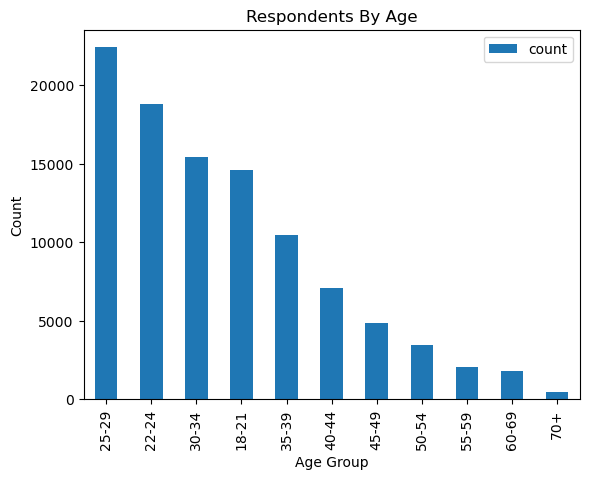

In [474]:
# Which age groups are more likely to respond or use certain tools.
import matplotlib.pyplot as plt
agegroup=df["Age"].value_counts().reset_index()
agegroup.columns=["Age Group","count"]
agegroup.plot(kind="bar", x="Age Group",y="count")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Respondents By Age")

In [476]:
#     Which industries are adopting data science more.
DS_adoptionRate=df[["Role","Industry"]][(df["Role"]=="Data Scientist") & (df["Industry"].notna())].groupby("Industry")["Role"].count().sort_values(ascending=False)

Text(0.5, 1.0, 'Industries Employing Data Science')

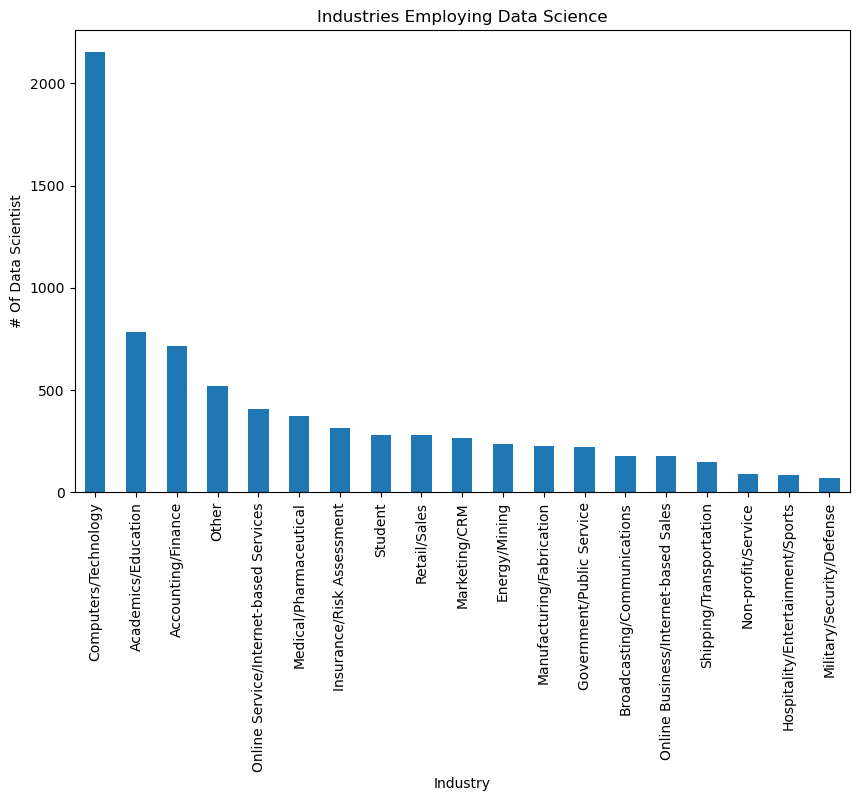

In [478]:
DS_adoptionRate.plot(kind="bar", figsize=(10,6))
plt.ylabel("# Of Data Scientist")
plt.title("Industries Employing Data Science")

Text(0, 0.5, 'Number of Respondents')

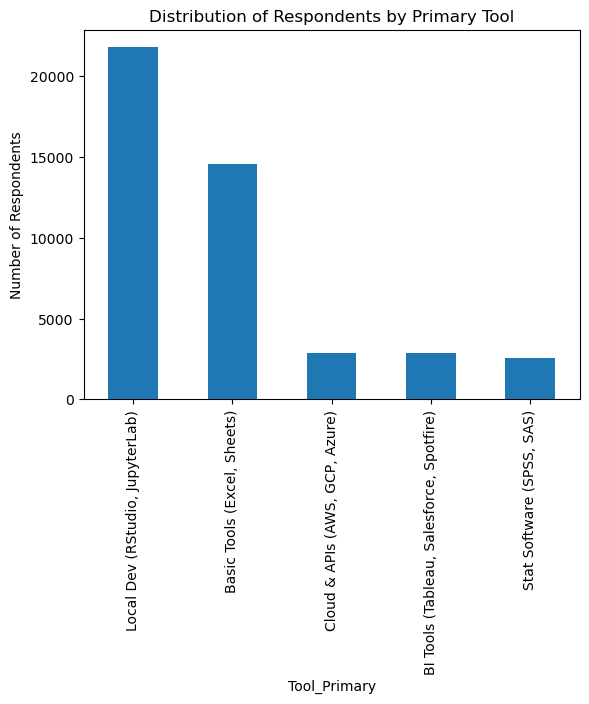

In [490]:
df["Tool_Primary"].value_counts().plot(kind="bar")
plt.title("Distribution of Respondents by Primary Tool")
plt.ylabel("Number of Respondents")

Text(0, 0.5, '')

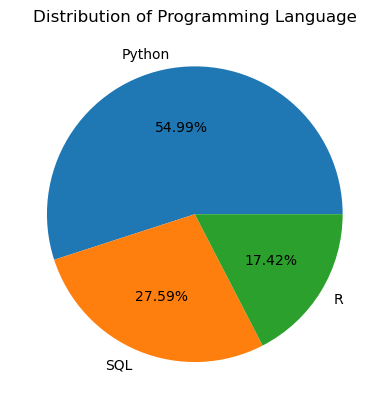

In [662]:

#     #which 3 porgramming language is mostly used in data sceince/data analyst Role
langCol=df.columns[7:18]
all_lang=df[langCol].stack()
all_lang=all_lang.value_counts().sort_values(ascending=False).head(3)
all_lang.plot(kind="pie",autopct="%1.2f%%")
plt.title("Distribution of Programming Language")
plt.ylabel("")

In [598]:
#Data Scientists generally more experienced than Data Analysts in coding Years
experieced=df[((df["Role"]=="Data Analyst") | (df["Role"]=="Data Scientist"))][["Role","Coding_Years"]].groupby(["Role","Coding_Years"]).size()

In [616]:
experieced=experieced.reset_index(name="count").sort_values(["Role","count"],ascending=(True,False))

In [624]:
experieced=experieced.pivot_table(index="Coding_Years",columns="Role", values="count")

Text(0.5, 1.0, 'Coding Experience Distribution: Data Scientists vs Data Analysts')

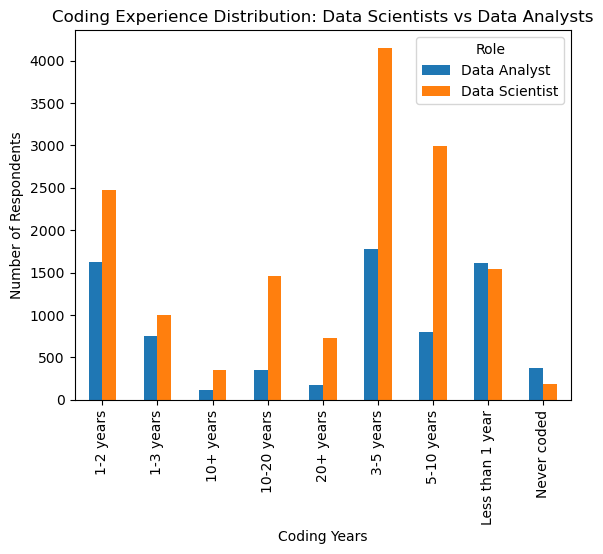

In [701]:
import matplotlib.pyplot as plt
experieced.plot(kind="bar")
plt.ylabel("Number of Respondents")
plt.xlabel("Coding Years")
plt.title("Coding Experience Distribution: Data Scientists vs Data Analysts")